In [103]:
# -*- coding: utf-8 -*-
import os
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
# 小说数据集目录和文件列表
novel_dir = './cn_words'
punctuation_path = "./DLNLP2023-main/cn_punctuation.txt"
stopwords_path = "./DLNLP2023-main/cn_stopwords.txt"

def read_files_and_merge(file_path):
    merged_text = ""
    for file_name in os.listdir(file_path):
        if file_name.endswith(".txt"):
            with open(os.path.join(file_path, file_name), 'r', encoding='ANSI') as file:
                merged_text += file.read()
    return merged_text

merged_text = read_files_and_merge(novel_dir)

# 加载标点符号和停用词
def load_list(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return set([line.strip() for line in file])

punctuation_path = "./DLNLP2023-main/cn_punctuation.txt"
stopwords_path = "./DLNLP2023-main/cn_stopwords.txt"

punctuations = load_list(punctuation_path)
stopwords = load_list(stopwords_path)

# 分词并去除标点符号和停用词
def tokenize_and_clean(text, punctuations, stopwords):
    tokens = jieba.lcut(text)
    cleaned_tokens = [token for token in tokens if token not in punctuations and token not in stopwords]
    return cleaned_tokens

# 预处理合并后的文本
cleaned_tokens = tokenize_and_clean(merged_text, punctuations, stopwords)


In [104]:
with open('cleaned_merged_text.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(cleaned_tokens))

In [105]:
# 训练Word2Vec模型
model = Word2Vec(sentences=cleaned_tokens, vector_size=300, window=5, min_count=1, workers=4)
model.save("word2vec.model")

计算词向量之间的语义距离

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 58031 (\ue2af) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 57552 (\ue0d0) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 57574 (\ue0e6) missing fro

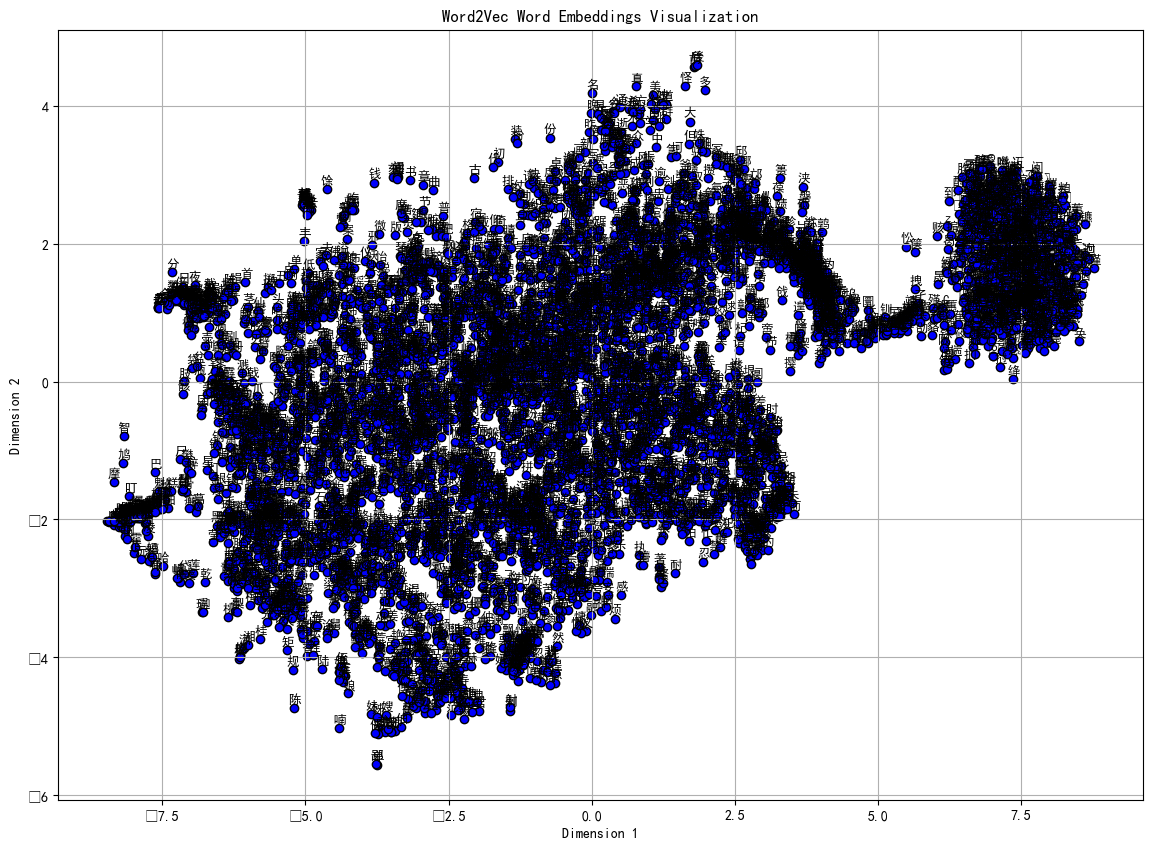

In [109]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 获取词向量
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# 使用PCA进行初步降维
pca = PCA(n_components=50)
pca_result = pca.fit_transform(word_vectors)

# 使用t-SNE进行进一步降维
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

# 可视化
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(14, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='blue', edgecolors='k')
for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom', fontsize=9)
plt.title("Word2Vec Word Embeddings Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

##进行词语聚类

In [108]:
from sklearn.cluster import KMeans
import numpy as np

# 提取词向量
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# KMeans聚类
kmeans = KMeans(n_clusters=10, random_state=0).fit(word_vectors)
labels = kmeans.labels_

# 输出每个簇的词语
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(words[i])

for cluster, words in clusters.items():
    print(f"簇 {cluster}: {words}")



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


簇 2: ['一', '人', '个', '两', '这', '三', '剑', '十', '二', '张', '年', '名', '日', '四', '几', '点', '招', '间', '里', '位', '半', '多', '数', '分', '万', '步', '指', '五', '段', '八', '七', '字', '六', '路', '百', '第', '千', '句', '余', '刻', '拳', '条', '次', '丈', '九', '晚', '件', '片', '月', '根', '谷', '样', '种', '部', '块', '夜', '场', '柄', '番', '把', '岁', '每', '座', '杯', '初', '碗', '队', '枝', '股', '尺', '等', '代', '袋', '式', '脉', '枚', '截', '匹', '套', '遍', '份', '颗', '寸', '层', '倍', '馀', '批', '斤', '载', '朵', '株', '艘', '粒', '幅', '页', '辆', '廿']
簇 1: ['\u3000', '\n', '中', ' ', '郭', '轻', '惊', '外', '胡', '靖', '叫', '=', '蓉', '灵', '峰', '著', '客', '麽', '誉', '音', '罢', '古', '登', '斐', '骂', '刚', '鬼', '男', '单', '哭', '观', '阴', '装', '狄', '襄', '但', '於', '曲', '新', '短', '芙', '□', '哪', '局', '担', '仗', '腹', '骗', '副', '宿', '降', '付', '聚', '节', '养', '续', '皆', '嗤', '扮', '稳', '托', '遥', '表', '孤', '赌', '充', '果', '谱', '象', '景', '棋', '乡', '梦', '诀', '买', '振', '诗', '戏', '户', '歇', '度', '唱', '俱', '倚', '卖', '伴', '杂', '歌', '联', '娶', '盟', '戴', '雅', '品', '敝', '怡', '悬', '渡', '或', '逸

##计算段落之间的语义关联

In [110]:
from scipy.spatial.distance import cosine
# 获取段落向量
def get_paragraph_vectors(texts, model, punctuations, stopwords):
    vectors = []
    for text in texts:
        tokens = jieba.lcut(text)
        cleaned_tokens = [token for token in tokens if token not in punctuations and token not in stopwords]
        vectors.append(np.mean([model.wv[token] for token in cleaned_tokens if token in model.wv], axis=0))
    return vectors
t1=[
    "这一阵歌声传入湖边一个道姑耳中。她在一排柳树下悄立已久，晚风拂动她杏黄色道袍的下摆，拂动她颈中所插拂尘的千百缕柔丝，心头思潮起伏，当真亦是‘芳心只共丝争乱’。",
    "天涯远不远？不远！人就在天涯，天涯怎么会远？明月是什么颜色的？”“是蓝的，就像海一样蓝，一样深，一样忧郁。”“明月在哪里？”“就在他心里，他的心就是明月。”“刀呢？”“刀就在他手里！”“那是柄什么样的刀？”“他的刀如天涯般辽阔寂寞，如明月般皎洁忧郁，有时一刀挥出，又仿佛是空的！",
    "章北海慢了一步，尽管他执剑至生命最后一刻，但依然死于同类之手。可是章北海不后悔，相反他感到解脱，因为自己的终极使命已经完成，人类的火种最终继续延续。章北海说出了令所有人为之动容的一句话：没关系的，都一样。",
    "超过五万年修为的魂兽数量虽然也不多，但却绝不像十万年魂兽那么稀少。不过，经历了唐三这次洗劫，也几乎将落日森林内五万年以上修为的魂兽消灭了大半。除了蓝银皇恢复到九环之外，他的昊天锤也吸收了两个魂环。所有魂环，全部是五万年以上修为。"
]
paragraph_vectors = get_paragraph_vectors(t1, model, punctuations, stopwords)

# 计算段落之间的相似度矩阵
def calculate_similarity_matrix(vectors):
    num_paragraphs = len(vectors)
    similarity_matrix = np.zeros((num_paragraphs, num_paragraphs))
    for i in range(num_paragraphs):
        for j in range(num_paragraphs):
            if i != j:
                similarity_matrix[i][j] = 1 - cosine(vectors[i], vectors[j])
            else:
                similarity_matrix[i][j] = 1  # 自己和自己相似度为1
    return similarity_matrix

# 计算相似度矩阵
similarity_matrix = calculate_similarity_matrix(paragraph_vectors)

# 打印相似度矩阵
similarity_df = pd.DataFrame(similarity_matrix)
print("段落相似度矩阵：")
print(similarity_df)

段落相似度矩阵：
          0         1         2         3
0  1.000000  0.277506 -0.047067  0.019844
1  0.277506  1.000000  0.088804  0.245144
2 -0.047067  0.088804  1.000000  0.158002
3  0.019844  0.245144  0.158002  1.000000
